# Configs

In [15]:
import json
import time
import pprint
import mdtraj
import random
import pandas
import nglview
import numpy as np
import matplotlib.pyplot as plt

from openmm import *
from tqdm.auto import tqdm
from matplotlib import animation 
from openmm.app import *
from openmm.unit import *
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

In [16]:
molecule = "alanine"
temperature = "300.0"
state = "alpha_P"

result_dir = f"../log/{molecule}/{temperature}/{state}"
pdb_file = f"../data/{molecule}/{state}.pdb"

In [17]:
arg_file = f"{result_dir}/args.json"

with open(arg_file, 'r') as f:
	arg_data = json.load(f)
 
pprint.pprint(arg_data)

{'config': 'config/alanine/debug.json',
 'force_field': 'amber99',
 'freq_csv': 1000,
 'freq_dcd': 1,
 'freq_stdout': 10000,
 'molecule': 'alanine',
 'platform': 'OpenCL',
 'precision': 'mixed',
 'solvent': 'tip3p',
 'state': 'alpha_P',
 'temperature': 300.0,
 'time': 100000000}


# Trajectory

In [18]:
start = time.time()
print("Loading trajectory...")
loaded_traj = mdtraj.load(
    f"{result_dir}/traj.dcd",
    top=pdb_file
)
end = time.time()
print(f"{end-start} seconds")
print("Trajectory loaded.!!")

Loading trajectory...
<--- 88.31295824050903 seconds --->


In [30]:
def plot_ram_with_states(loaded_traj, pdb_file, state):
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(6,6))
    phis = mdtraj.compute_phi(loaded_traj)[1].ravel()
    psis = mdtraj.compute_psi(loaded_traj)[1].ravel()
    
    state_traj = mdtraj.load(pdb_file)
    phi_start = mdtraj.compute_phi(state_traj)[1].ravel()
    psi_start = mdtraj.compute_psi(state_traj)[1].ravel()
    ax.set_title(f"State {state}")
    ax.scatter(phi_start * 180 / np.pi, psi_start * 180 / np.pi, c='red', s=100, zorder=1)
    
    # Ramachandran plot
    ax.hist2d(phis * 180 / np.pi, psis * 180 / np.pi, 100, norm=LogNorm(), zorder=0)
    ax.set_xlim(-180, 180)
    ax.set_ylim(-180, 180)
    ax.set_xticks(np.linspace(-180, 180, 5))
    ax.set_yticks(np.linspace(-180, 180, 5))
    ax.set_xlabel("Phi [deg]")
    ax.set_ylabel("Psi [deg]")
    fig.tight_layout()

<Figure size 640x480 with 0 Axes>

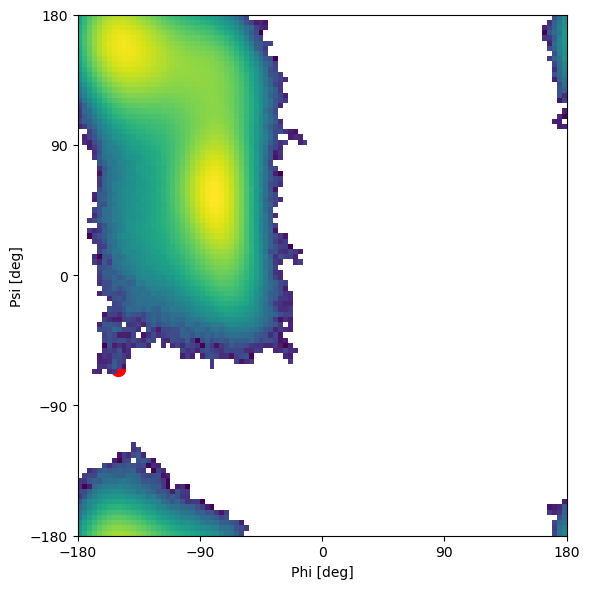

In [21]:
plot_ram_with_states(loaded_traj, pdb_file)

# Multiple state trajectories

>> State: c5
>> State: c7ax
>> State: alpha_P


<Figure size 640x480 with 0 Axes>

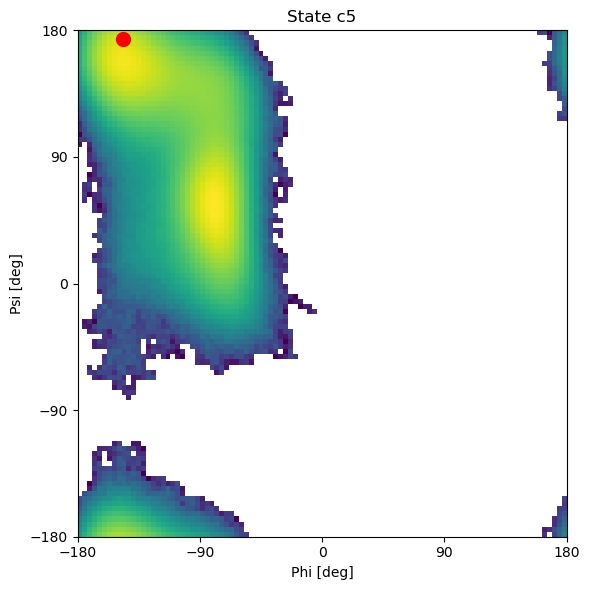

<Figure size 640x480 with 0 Axes>

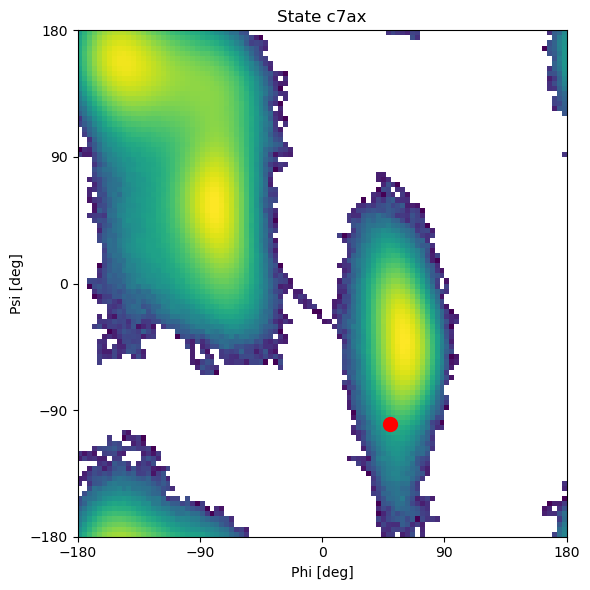

<Figure size 640x480 with 0 Axes>

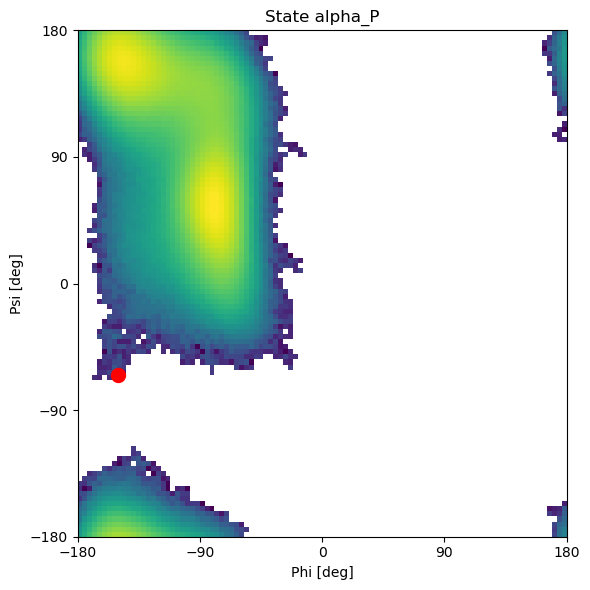

In [31]:
for state in ["c5", "c7ax", "alpha_P"]:
	print(f">> State: {state}")
	result_dir = f"../log/{molecule}/{temperature}/{state}"
	pdb_file = f"../data/{molecule}/{state}.pdb"
	# print(f">> Drawing Ramachandran plot...")
	loaded_traj = mdtraj.load(f"{result_dir}/traj.dcd",top=pdb_file)
	plot_ram_with_states(loaded_traj, pdb_file, state)